## Impact Plate analysis

In [1]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def Mel_Spectrogram_visual(filename):
    y, sr = librosa.load(filename)
    
    frame_length = 0.02  # 20ms
    frame_stride = 0.01  # 10ms
    n_fft = 256  # FFT length
    n_mels = 40  # Number of Mel filters
    fmin = 0  # Minimum frequency
    fmax = sr / 2  # Maximum frequency (Nyquist frequency)
    hop_length = int(frame_stride * sr)
    win_length = min(int(frame_length * sr), n_fft) 
    
    # Mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, win_length=win_length, fmin=fmin, fmax=fmax)
    S_dB = librosa.power_to_db(S, ref=np.max)

    cmap = plt.get_cmap('RdBu_r')
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap=cmap)
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')
    plt.tight_layout()
    plt.show()

In [5]:
from pydub import AudioSegment

def convert_m4a_to_wav(m4a_file, output_folder):
    # Load the m4a file
    audio = AudioSegment.from_file(m4a_file, format="m4a")
    
    # Define the output .wav file path
    wav_file = os.path.join(output_folder, os.path.splitext(os.path.basename(m4a_file))[0] + '.wav')
    
    # Export the audio file to .wav format
    audio.export(wav_file, format="wav")
    
    print(f"Converted finished")


subdirectories = ['pp', 'foam_board', 'hdpe', 'pvc']
file_names = ['Can.m4a', 'Plastic.m4a', 'Glass.m4a']

for material in subdirectories:
    for file_name in file_names:
        input_file = os.path.join(f'impact_plate_analysis/{material}', file_name)
        output_folder = f'impact_plate_analysis/{material}'
        
        if os.path.exists(input_file):
            convert_m4a_to_wav(input_file, output_folder)
        else:
            print(f"File {input_file} does not exist.")

Converted finished
Converted finished
Converted finished
Converted finished
Converted finished
Converted finished
Converted finished
Converted finished
Converted finished
Converted finished
Converted finished
Converted finished


In [43]:
# read dataset
import os

pp = {}
foam_board = {}
hdpe = {}
pvc = {}

folder_name = 'impact_plate_analysis'
files = os.listdir(folder_name)

# Function to categorize files in a subdirectory
def categorize_files(subdir_path, material_dict):
    subdir_files = os.listdir(subdir_path)
    for subdir_file in subdir_files:
        if '.wav' in subdir_file.lower():
            if 'can' in subdir_file.lower():
                material_dict['can'] = subdir_file
            elif 'glass' in subdir_file.lower():
                material_dict['glass'] = subdir_file
            elif 'plastic' in subdir_file.lower():
                material_dict['plastic'] = subdir_file
            
# Iterate over each subdirectory and categorize files
for subdir in subdirectories:
    subdir_path = os.path.join(folder_name, subdir)
    if os.path.isdir(subdir_path):
        if subdir == 'pp':
            categorize_files(subdir_path, pp)
        elif subdir == 'foam_board':
            categorize_files(subdir_path, foam_board)
        elif subdir == 'hdpe':
            categorize_files(subdir_path, hdpe)
        elif subdir == 'pvc':
            categorize_files(subdir_path, pvc)

# Print the categorized files for each material
print("PP:", pp)
print("Foam Board:", foam_board)
print("HDPE:", hdpe)
print("PVC:", pvc)

PP: {'can': 'Can.wav', 'plastic': 'Plastic.wav', 'glass': 'Glass.wav'}
Foam Board: {'can': 'Can.wav', 'plastic': 'Plastic.wav', 'glass': 'Glass.wav'}
HDPE: {'can': 'Can.wav', 'plastic': 'Plastic.wav', 'glass': 'Glass.wav'}
PVC: {'can': 'Can.wav', 'plastic': 'Plastic.wav', 'glass': 'Glass.wav'}


## Compare

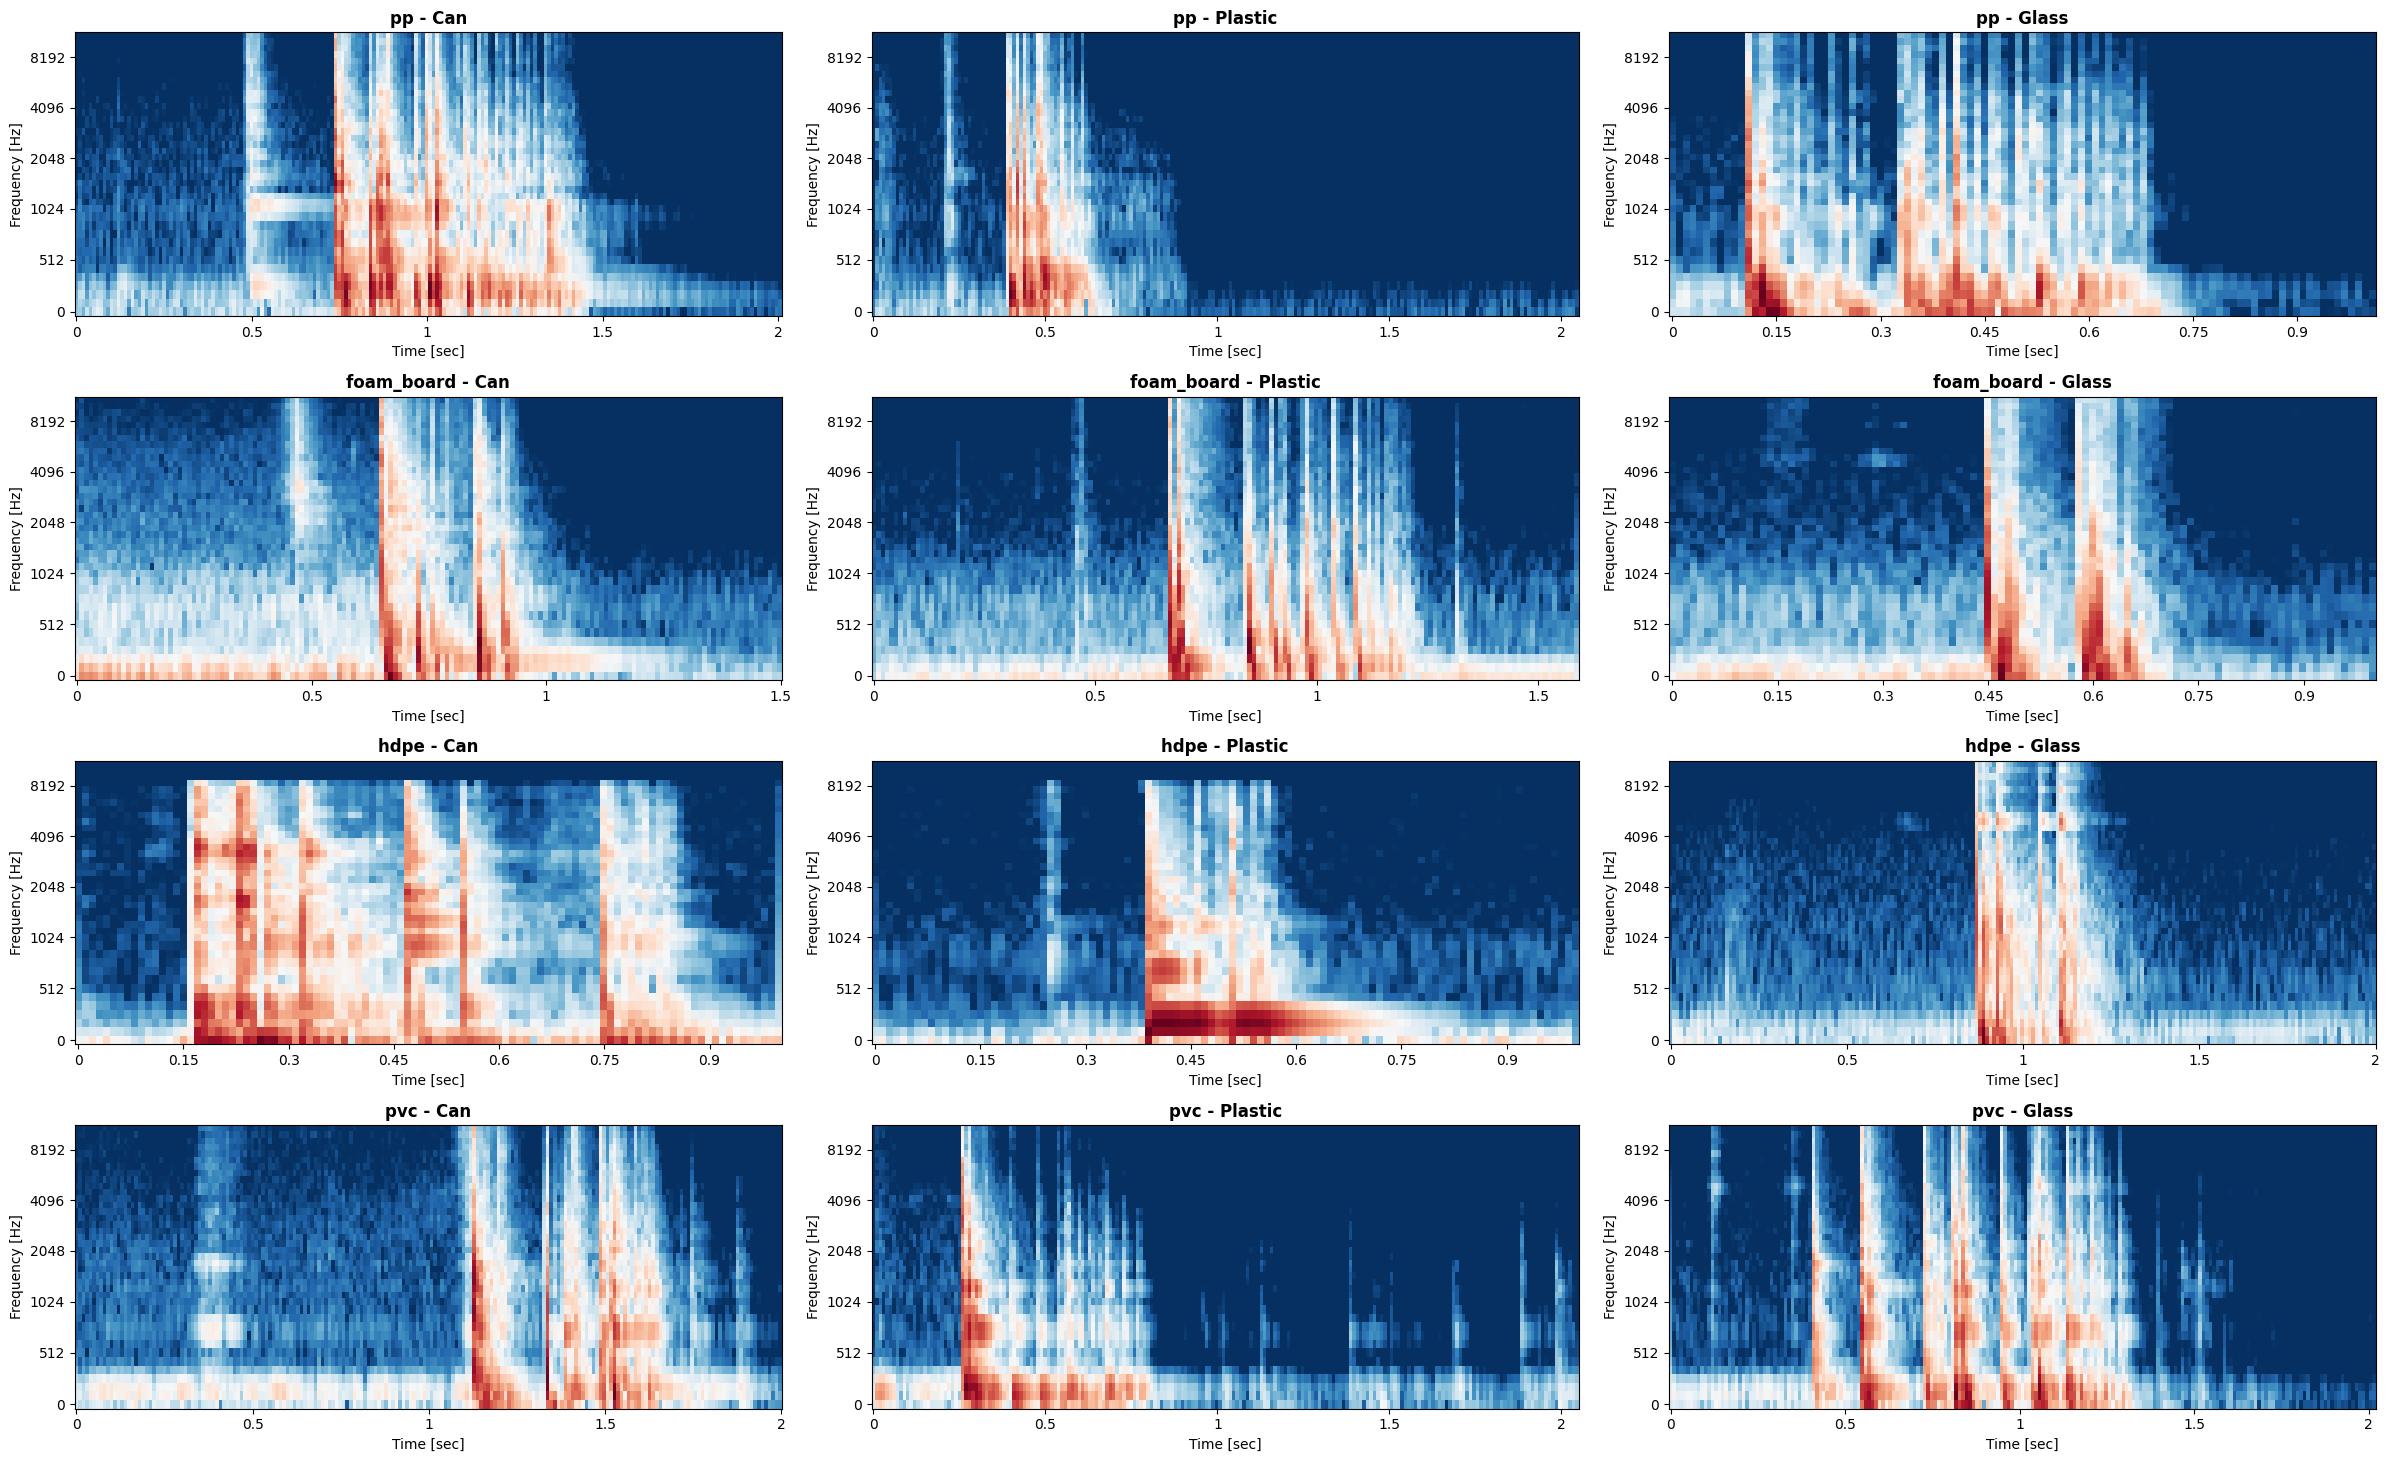

In [44]:
ubdirectories = ['pp', 'foam_board', 'hdpe', 'pvc']
file_types = ['can', 'plastic', 'glass']

fig, axes = plt.subplots(4, 3, figsize=(24, 16))  # Adjust to a 4x3 grid

for col, material in enumerate(subdirectories):
    for row, file_type in enumerate(file_types):
        filename = os.path.join(f'impact_plate_analysis/{material}', f'{file_type}.wav')
        if os.path.exists(filename):
            y, sr = librosa.load(filename)
            
            frame_length = 0.02  # 20ms
            frame_stride = 0.01  # 10ms
            n_fft = 256  # FFT length
            n_mels = 40  # Number of Mel filters
            fmin = 0  # Minimum frequency
            fmax = sr / 2  # Maximum frequency (Nyquist frequency)
            hop_length = int(frame_stride * sr)
            win_length = min(int(frame_length * sr), n_fft) 
            
            # Mel spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, win_length=win_length, fmin=fmin, fmax=fmax)
            S_dB = librosa.power_to_db(S, ref=np.max)

            cmap = plt.get_cmap('RdBu_r')
            ax = axes[col, row]  # Swap indices to match 4x3 grid
            img = librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap=cmap, ax=ax)
            ax.set_title(f'{material} - {file_type.capitalize()}', fontweight='bold' )
            ax.set_xlabel('Time [sec]')
            ax.set_ylabel('Frequency [Hz]')

# Adjust layout
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()